import pandas as pd

data=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Maching Learning & AI/Practice Files/Mall_Customers.csv',index_col='CustomerID')

data.head()

data.tail()

data.describe()





Importing the data using Pandas library and understanding summary statistics

In [10]:
pd.isnull(data)


,Genre,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


Understanding if are there any missing data!

In [11]:
Genre_dummy=pd.get_dummies(data['Genre'])

Genre_dummy


,Female,Male
CustomerID,,
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0
...,...,...
196,1,0
197,1,0
198,0,1


In [12]:
data=pd.concat([data,Genre_dummy],axis=1)

data


,Genre,Age,AnnualIncome,SpendingScore,Female,Male
CustomerID,,,,,,
1,Male,19,15,39,0,1
2,Male,21,15,81,0,1
3,Female,20,16,6,1,0
4,Female,23,16,77,1,0
5,Female,31,17,40,1,0
...,...,...,...,...,...,...
196,Female,35,120,79,1,0
197,Female,45,126,28,1,0
198,Male,32,126,74,0,1


Generating dummy features for Genre feature as KMeans do not support categorical variables


Number of clusters: 2 
Clustering: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1] 
Inertia with 2 Clusters: 212938.7150895141 
Silhouette_score with 2 Clusters: 0.29298136996751367 
Centroids: [[46.16521739 59.36521739 32.88695652  0.56521739  0.43478261]
 [28.95294118 62.17647059 73.62352941  0.55294118  0.44705882]]

Number of clusters: 3 
Clustering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0

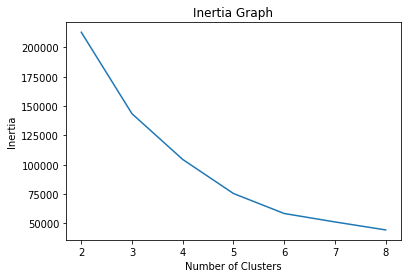

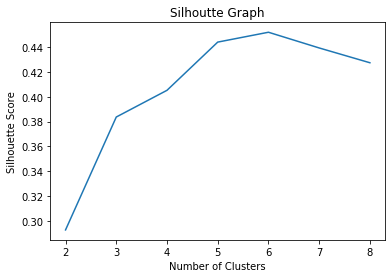

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster=[]
Inertia=[]
silscore=[]

x=data[['Age','AnnualIncome','SpendingScore','Female','Male']].copy(deep=True)

for k in range(2,9):
    kmeans=KMeans(n_clusters=k,n_init=25)

    y_pred=kmeans.fit_predict(x)
    
    cluster.append(k)
    Inertia.append(kmeans.inertia_)
    
    silscore.append(silhouette_score(x,kmeans.labels_))

    
    print("\n"'Number of clusters:',k,"\n"'Clustering:',y_pred,"\n"'Inertia with',k,'Clusters:',kmeans.inertia_,"\n"
          'Silhouette_score with',k,'Clusters:',silhouette_score(x,kmeans.labels_),"\n"'Centroids:',kmeans.cluster_centers_) 
    


plt.plot(cluster,Inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia Graph')
plt.show()

plt.plot(cluster,silscore)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhoutte Graph')
plt.show()




Number of clusters: 6 
Clustering: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0) 
Inertia with 6 Clusters: 58396.839405039405 
Silhouette_score with 6 Clusters: 0.45176811980591935 
Centroids: [[32.69230769 86.53846154 82.12820513  0.53846154  0.46153846]
 [56.15555556 53.37777778 49.08888889  0.55555556  0.44444444]
 [41.68571429 88.22857143 17.28571429  0.42857143  0.57142857]
 [27.         56.65789474 49.13157895  0.65789474  0.34210526]
 [44.14285714 25.14285714 19.52380952  0.61904762  0.38095238]
 [25.27272727 25.72727273 79.36363636  0.59090909  0.40909091]]


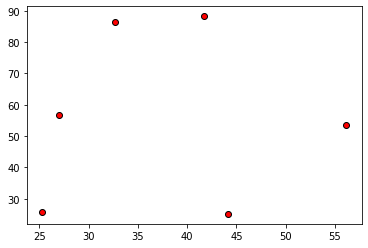

In [140]:
kmeans=KMeans(n_clusters=6,n_init=25)

y_pred=kmeans.fit(x)
    
print("\n"'Number of clusters:',6,"\n"'Clustering:',y_pred,"\n"'Inertia with',6,'Clusters:',kmeans.inertia_,"\n"
          'Silhouette_score with',6,'Clusters:',silhouette_score(x,kmeans.labels_),"\n"'Centroids:',kmeans.cluster_centers_) 


#plt.scatter(x[:,0], x[:,1], s=100, c=y_pred., label ='Cluster 1')
#plt.scatter(x[y_pred==1, 0], x[y_pred==1, 1], s=100, c='blue', label ='Cluster 2')
#plt.scatter(x[y_pred==2, 0], x[y_pred==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(x[y_kmeans==3, 0], x[y_pred==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(x[y_pred==4, 0], x[y_pred==4, 1], s=100, c='magenta', label ='Cluster 5')
#plt.scatter(x[y_pred==5, 0], x[y_pred==5, 1], s=100, c='orange', label ='Cluster 5')

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c='red', edgecolor='black',
    label='centroids'
)
#plt.legend(scatterpoints=1)
#plt.grid()
#plt.show()

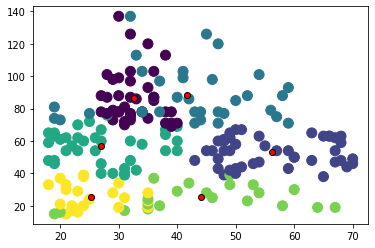

In [144]:
plt.figure;
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=100, c=y_pred.labels_)

plt.scatter(
    y_pred.cluster_centers_[:, 0], y_pred.cluster_centers_[:, 1],
    c='red', edgecolor='black',
    label='centroids'
)


In [17]:


kmeans.cluster_centers_


array([[41.68571429, 88.22857143, 17.28571429,  0.42857143,  0.57142857],
       [27.        , 56.65789474, 49.13157895,  0.65789474,  0.34210526],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [44.14285714, 25.14285714, 19.52380952,  0.61904762,  0.38095238],
       [25.27272727, 25.72727273, 79.36363636,  0.59090909,  0.40909091],
       [56.15555556, 53.37777778, 49.08888889,  0.55555556,  0.44444444]])